# Capstone Project - World Happiness Index

### Import libraries

In [1]:
#Import libraries                
import numpy as np           
import pandas as pd           
import matplotlib.pyplot as plt                  
import seaborn as sns
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
import os                    
import sys                  
import types

In [2]:
#Import visualization libraries
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

### Import datasets

In [3]:
#Import happiness report data
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e9f96d10605444448e805f3c23c44609 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SfR52bCJDFY88aOlRp8PPEiVItwV4ZqAZ7P03fHp9VKE',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e9f96d10605444448e805f3c23c44609.get_object(Bucket='courseracapstone-donotdelete-pr-helg0wnmao2fxf',Key='2015.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data= pd.read_csv(body)
df_data_1=df_data.drop(['Happiness Rank','Family','Dystopia Residual'],axis=1)
df_data_1.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,7.587,0.03411,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,0.04884,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,0.03328,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,0.03880,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,0.03553,1.32629,0.90563,0.63297,0.32957,0.45811


In [4]:
df_data_1.shape

(158, 9)

In [5]:
#Import location data
body = client_e9f96d10605444448e805f3c23c44609.get_object(Bucket='courseracapstone-donotdelete-pr-helg0wnmao2fxf',Key='concap.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)

df_data_2.rename(columns={'CountryName':'Country', 'CapitalName':'Capital','CapitalLatitude':'Latitude','CapitalLongitude':'Longitude'},inplace=True)
df_data_2=df_data_2.drop(['ContinentName','CountryCode'],axis=1)
df_data_2.head()

,Country,Capital,Latitude,Longitude
0,Somaliland,Hargeisa,9.550000,44.050000
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667
3,Palestine,Jerusalem,31.766667,35.233333
4,Aland Islands,Mariehamn,60.116667,19.900000


In [6]:
df_data_2.shape

(245, 4)

In [7]:
# Merge the dataframes
dfmerge = pd.merge(df_data_2, df_data_1, on=['Country'], how='inner')
dfmerge2 = dfmerge [['Region','Country','Capital','Latitude', 'Longitude',
                     'Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']].copy()

dfcombined=dfmerge2.sort_values(by='Happiness Score', ascending=False)
dfcombined.head()

,Region,Country,Capital,Latitude,Longitude,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
128,Western Europe,Switzerland,Bern,46.916667,7.466667,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
56,Western Europe,Iceland,Reykjavik,64.150000,-21.950000,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
36,Western Europe,Denmark,Copenhagen,55.666667,12.583333,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
101,Western Europe,Norway,Oslo,59.916667,10.750000,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
25,North America,Canada,Ottawa,45.416667,-75.700000,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


In [8]:
dfcombined.shape

(152, 11)

## Data Analysis

### Investigating variables

Text(0.5,0.98,'Correlation Map')

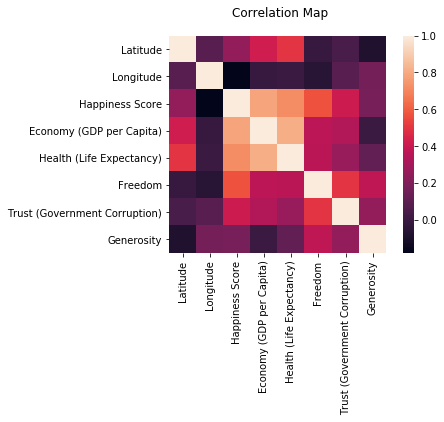

In [9]:
#correlation
sns.heatmap(dfcombined.corr(), square=True)
plt.suptitle("Correlation Map")

In [10]:
#variable means
mean_score=(dfcombined['Happiness Score'].mean())
mean_gdp=(dfcombined['Economy (GDP per Capita)'].mean())
mean_h=(dfcombined['Health (Life Expectancy)'].mean())
mean_fd=(dfcombined['Freedom'].mean())
mean_gov=(dfcombined['Trust (Government Corruption)'].mean())
mean_gen=(dfcombined['Generosity'].mean())

list_mean=[mean_score, mean_gdp, mean_h, mean_fd, mean_gov, mean_gen]

#import table
df_mean = pd.DataFrame(list_mean, index=['Happiness Score','Economy','Health','Freedom','Gov Trust','Generosity'])
df_mean.columns = ['Average']
df_mean

,Average
Happiness Score,5.406171
Economy,0.858885
Health,0.638146
Freedom,0.430334
Gov Trust,0.142218
Generosity,0.237115


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



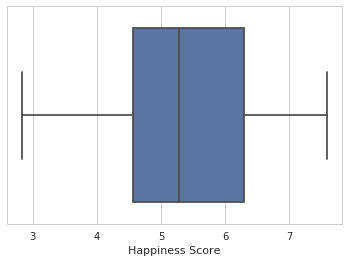

In [11]:
#boxplot of happiness score distribution
sns.set(style="whitegrid")
ax = sns.boxplot(x = dfcombined["Happiness Score"])
plt.show()

In [12]:
# calculations related to mean happiness score
df_less=dfcombined[(dfcombined['Happiness Score'] < mean_score)]
lesspct= df_less.shape[0]*100/dfcombined.shape[0]

print(df_less.shape[0],'countries(',lesspct,'%)','with happiness score lower than mean.')
print((dfcombined.shape[0]-df_less.shape[0]),'countries(',(100-lesspct),'%)','with happiness score higher than mean.')

80 countries( 52.63157894736842 %) with happiness score lower than mean.
72 countries( 47.36842105263158 %) with happiness score higher than mean.


### Investigation by Region

In [13]:
#Create map of happiness score
data = dict(type = 'choropleth', 
           locations = dfcombined['Country'],
           locationmode = 'country names',
           z = dfcombined['Happiness Score'], 
           text = dfcombined['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Global Happiness Index 2015', 
             geo = dict(showframe = False, 

                        projection = {'type': 'Mercator'}))
scoremap = go.Figure(data = [data], layout=layout)

iplot(scoremap)

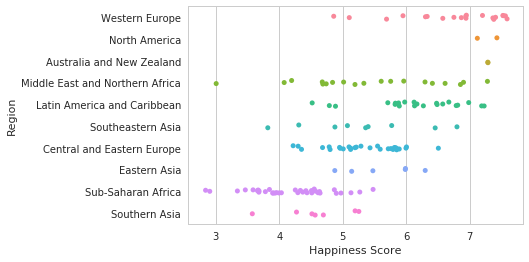

In [14]:
#spread by region
plotregion = sns.stripplot(x="Happiness Score", y="Region", data=dfcombined, jitter=True)

In [15]:
#means by region
region_mean = dfcombined.groupby(['Region'])['Happiness Score'].mean()
region_gdp = dfcombined.groupby(['Region'])['Economy (GDP per Capita)'].mean()
region_h = dfcombined.groupby(['Region'])['Health (Life Expectancy)'].mean()
region_fd = dfcombined.groupby(['Region'])['Freedom'].mean()
region_gov = dfcombined.groupby(['Region'])['Trust (Government Corruption)'].mean()
region_gen = dfcombined.groupby(['Region'])['Generosity'].mean()

list_rmean = [region_mean, region_gdp, region_h, region_fd, region_gov, region_gen]
list_rmean

#import table
df_rmean = pd.DataFrame(list_rmean, index=['Happniness Score','Economy','Health','Freedom','Gov Trust','Generosity'])
df_rmean

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Happniness Score,7.285000,5.332931,5.626167,6.144682,5.443316,7.273000,5.317444,4.580857,4.191500,6.739350
Economy,1.291880,0.942438,1.151780,0.876815,1.091621,1.360400,0.789054,0.560486,0.385735,1.303122
Health,0.919965,0.718774,0.877388,0.703870,0.708008,0.883710,0.677357,0.540830,0.285948,0.908427
Freedom,0.645310,0.358269,0.462490,0.501740,0.367896,0.589505,0.557104,0.373337,0.362849,0.552909
Gov Trust,0.392795,0.086674,0.127695,0.117172,0.184473,0.244235,0.151276,0.102536,0.116208,0.235896
Generosity,0.455315,0.152264,0.225885,0.217788,0.194474,0.429580,0.419261,0.341429,0.215789,0.304130


In [16]:
# happiness ranking
region_mean.sort_values(ascending=False, inplace=True)

data = [go.Bar(x=region_mean.index, y=region_mean.values)]
layout = go.Layout(barmode='stack')
layout = dict(title = '2015 Happiness Ranking by Region', xaxis= dict(title= 'Region',zeroline= False))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [17]:
#create map showing the distribution of the top/least 10% countries
df_happy=dfcombined.head(15)
df_nhappy=dfcombined.tail(15)

address = 'world'
geolocator = Nominatim(user_agent="world_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

mapshow = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, capital, country in zip(df_happy['Latitude'], df_happy['Longitude'], df_happy['Capital'], df_happy['Country']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup="Country with high happiness score",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(mapshow)
    
for lat, lng, capital, country in zip(df_nhappy['Latitude'], df_nhappy['Longitude'], df_nhappy['Capital'], df_nhappy['Country']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup='Country with low happiness score',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(mapshow)
      
mapshow

### Investiagion by Economy

Text(0.5,1,'Happiness VS Economy')

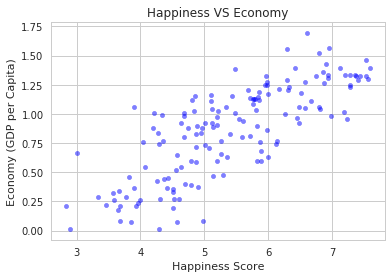

In [18]:
dfcombined.plot(kind='scatter', x='Happiness Score', y='Economy (GDP per Capita)', alpha = 0.5, color = 'b')
plt.xlabel('Happiness Score')           
plt.ylabel('Economy (GDP per Capita)')
plt.title('Happiness VS Economy')

In [ ]:
corrcoef()

In [19]:
dfcombined_gdp=dfcombined.sort_values(by='Economy (GDP per Capita)', ascending=False)
dfcombined_gdp.head()

,Region,Country,Capital,Latitude,Longitude,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
110,Middle East and Northern Africa,Qatar,Doha,25.283333,51.533333,6.611,1.69042,0.79733,0.64040,0.52208,0.32573
80,Western Europe,Luxembourg,Luxembourg,49.600000,6.116667,6.946,1.56391,0.91894,0.61583,0.37798,0.28034
71,Middle East and Northern Africa,Kuwait,Kuwait City,29.366667,47.966667,6.295,1.55422,0.72492,0.55499,0.25609,0.16228
118,Southeastern Asia,Singapore,Singapore,1.283333,103.850000,6.798,1.52186,1.02525,0.54252,0.49210,0.31105
101,Western Europe,Norway,Oslo,59.916667,10.750000,7.522,1.45900,0.88521,0.66973,0.36503,0.34699


In [20]:
#create map showing the distribution of the highest 10% GDP countries

df_topgdp=dfcombined_gdp.head(15)

address = 'world'
geolocator = Nominatim(user_agent="world_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

mapshow2 = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, capital, country in zip(df_topgdp['Latitude'], df_topgdp['Longitude'], df_topgdp['Capital'], df_topgdp['Country']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup='Country with highest GDP',
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(mapshow2)
      
mapshow2

### Investigation by Health

Text(0.5,1,'Happiness VS Health')

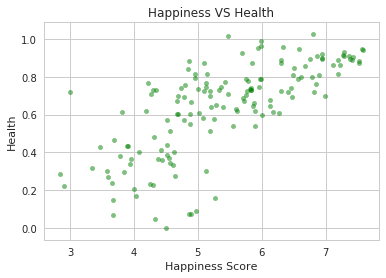

In [21]:
dfcombined.plot(kind='scatter', x='Happiness Score', y='Health (Life Expectancy)', alpha = 0.5, color = 'g')
plt.xlabel('Happiness Score')       
plt.ylabel('Health')
plt.title('Happiness VS Health')

In [22]:
dfcombined_h=dfcombined.sort_values(by='Health (Life Expectancy)', ascending=False)
dfcombined_h.head()

,Region,Country,Capital,Latitude,Longitude,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
118,Southeastern Asia,Singapore,Singapore,1.283333,103.850000,6.798,1.52186,1.02525,0.54252,0.49210,0.31105
151,Eastern Asia,Hong Kong,NaN,0.000000,0.000000,5.474,1.38604,1.01328,0.59608,0.37124,0.39478
65,Eastern Asia,Japan,Tokyo,35.683333,139.750000,5.987,1.27074,0.99111,0.49615,0.18060,0.10705
69,Eastern Asia,South Korea,Seoul,37.550000,126.983333,5.984,1.24461,0.96538,0.33208,0.07857,0.18557
122,Western Europe,Spain,Madrid,40.400000,-3.683333,6.329,1.23011,0.95562,0.45951,0.06398,0.18227


In [23]:
#create map showing the distribution of 10% countries with highest life expectancy

df_toph=dfcombined_h.head(15)

address = 'world'
geolocator = Nominatim(user_agent="world_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

mapshow3 = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map  
for lat, lng, capital, country in zip(df_toph['Latitude'], df_toph['Longitude'], df_toph['Capital'], df_toph['Country']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup='Country with highest life expectancy',
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(mapshow3)
      
mapshow3

### Investigation by Freedom

Text(0.5,1,'Happiness VS Freedom')

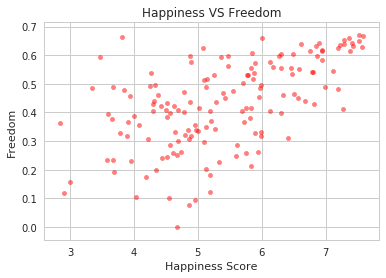

In [24]:
dfcombined.plot(kind='scatter', x='Happiness Score', y='Freedom', alpha = 0.5, color = 'r')
plt.xlabel('Happiness Score')       
plt.ylabel('Freedom')
plt.title('Happiness VS Freedom')

In [25]:
dfcombined_fd=dfcombined.sort_values(by='Freedom', ascending=False)
dfcombined_fd.head()

,Region,Country,Capital,Latitude,Longitude,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
101,Western Europe,Norway,Oslo,59.916667,10.750000,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
128,Western Europe,Switzerland,Bern,46.916667,7.466667,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
23,Southeastern Asia,Cambodia,Phnom Penh,11.550000,104.916667,3.819,0.46038,0.61114,0.66246,0.07247,0.40359
127,Western Europe,Sweden,Stockholm,59.333333,18.050000,7.364,1.33171,0.91087,0.65980,0.43844,0.36262
145,Central and Eastern Europe,Uzbekistan,Tashkent,41.316667,69.250000,6.003,0.63244,0.59772,0.65821,0.30826,0.22837


In [26]:
#create map showing the distribution of the 10% countries with highest fredom

df_topfd=dfcombined_fd.head(15)

address = 'world'
geolocator = Nominatim(user_agent="world_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

mapshow4 = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map    
for lat, lng, capital, country in zip(df_topfd['Latitude'], df_topfd['Longitude'], df_topfd['Capital'], df_topfd['Country']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup='Country with highest freedom',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(mapshow4)
      
mapshow4

### Investigation by Government Trust

Text(0.5,1,'Happiness VS Gov Trust')

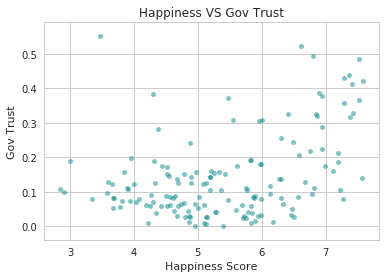

In [27]:
dfcombined.plot(kind='scatter', x='Happiness Score', y='Trust (Government Corruption)', alpha = 0.5, color = 'darkcyan')
plt.xlabel('Happiness Score')       
plt.ylabel('Gov Trust')
plt.title('Happiness VS Gov Trust')

In [28]:
dfcombined_gov=dfcombined.sort_values(by='Trust (Government Corruption)', ascending=False)
dfcombined_gov.head()

,Region,Country,Capital,Latitude,Longitude,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
113,Sub-Saharan Africa,Rwanda,Kigali,-1.950000,30.050000,3.465,0.22208,0.42864,0.59201,0.55191,0.22628
110,Middle East and Northern Africa,Qatar,Doha,25.283333,51.533333,6.611,1.69042,0.79733,0.64040,0.52208,0.32573
118,Southeastern Asia,Singapore,Singapore,1.283333,103.850000,6.798,1.52186,1.02525,0.54252,0.49210,0.31105
36,Western Europe,Denmark,Copenhagen,55.666667,12.583333,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
127,Western Europe,Sweden,Stockholm,59.333333,18.050000,7.364,1.33171,0.91087,0.65980,0.43844,0.36262


In [29]:
#create map showing the distribution of 10% countries with highest gov trust
df_topg=dfcombined_gov.head(15)

address = 'world'
geolocator = Nominatim(user_agent="world_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

mapshow5 = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, capital, country in zip(df_topg['Latitude'], df_topg['Longitude'], df_topg['Capital'], df_topg['Country']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup='Country with highest government trust',
        color='darkcyan',
        fill=True,
        fill_color='darkcyan',
        fill_opacity=0.7,
        parse_html=False).add_to(mapshow5)
      
mapshow5

### Investigation by Generosity

Text(0.5,1,'Generosity')

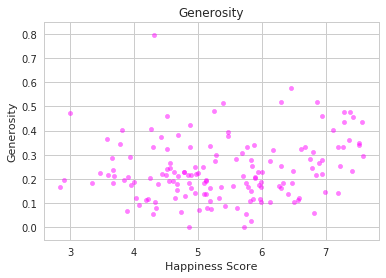

In [30]:
dfcombined.plot(kind='scatter', x='Happiness Score', y='Generosity', alpha = 0.5, color='magenta')
plt.xlabel('Happiness Score')       
plt.ylabel('Generosity')
plt.title('Generosity')

In [31]:
dfcombined_gen=dfcombined.sort_values(by='Generosity', ascending=False)
dfcombined_gen.head()

,Region,Country,Capital,Latitude,Longitude,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
21,Southeastern Asia,Myanmar,Rangoon,16.800000,96.150000,4.307,0.27108,0.48246,0.44017,0.19034,0.79588
133,Southeastern Asia,Thailand,Bangkok,13.750000,100.516667,6.455,0.96690,0.73850,0.55664,0.03187,0.57630
142,Western Europe,United Kingdom,London,51.500000,-0.083333,6.867,1.26637,0.90943,0.59625,0.32067,0.51912
86,Western Europe,Malta,Valletta,35.883333,14.500000,6.302,1.20740,0.88721,0.60365,0.13586,0.51752
58,Southeastern Asia,Indonesia,Jakarta,-6.166667,106.816667,5.399,0.82827,0.63793,0.46611,0.00000,0.51535


In [32]:
#create map showing the distribution of 10% countries with highest generosity
df_topgn=dfcombined_gen.head(15)

address = 'world'
geolocator = Nominatim(user_agent="world_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

mapshow6 = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, capital, country in zip(df_topgn['Latitude'], df_topgn['Longitude'], df_topgn['Capital'], df_topgn['Country']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup='Country with highest generosity',
        color='magenta',
        fill=True,
        fill_color='magenta',
        fill_opacity=0.7,
        parse_html=False).add_to(mapshow6)
      
mapshow6